In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive'


MyDrive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/single/train'
test_path = '/content/drive/MyDrive/single/val'

Working with 77 images
Image examples: 
20230316_010953.jpg


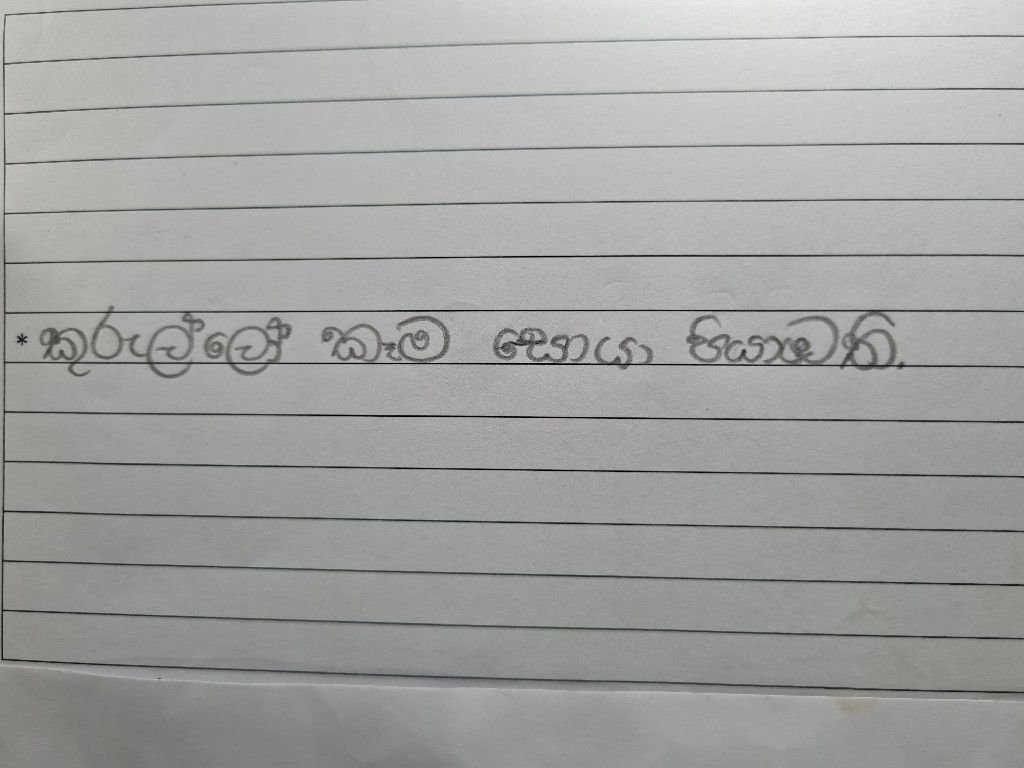

20230316_010652.jpg


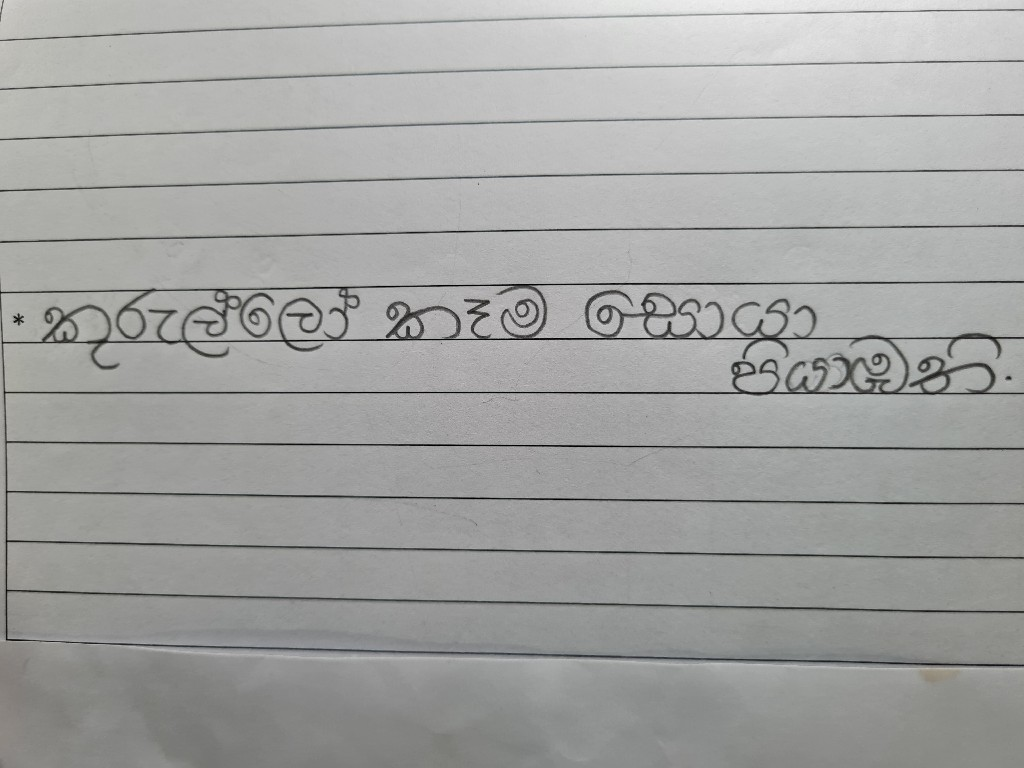

20230316_010551.jpg


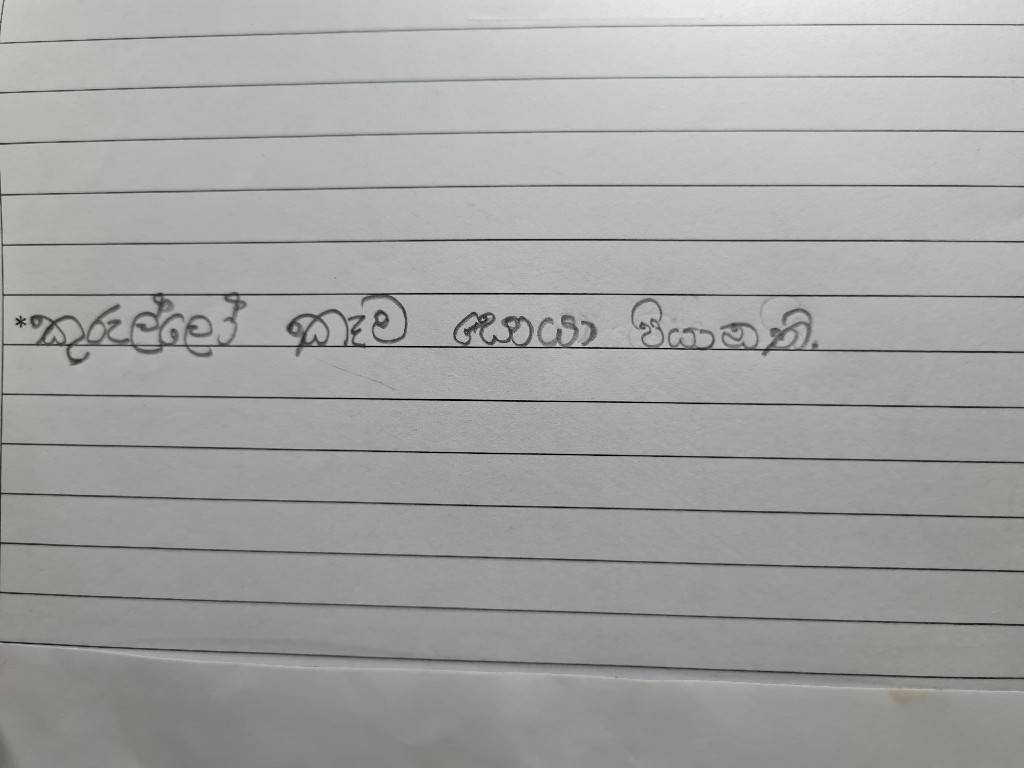

20230316_010437.jpg


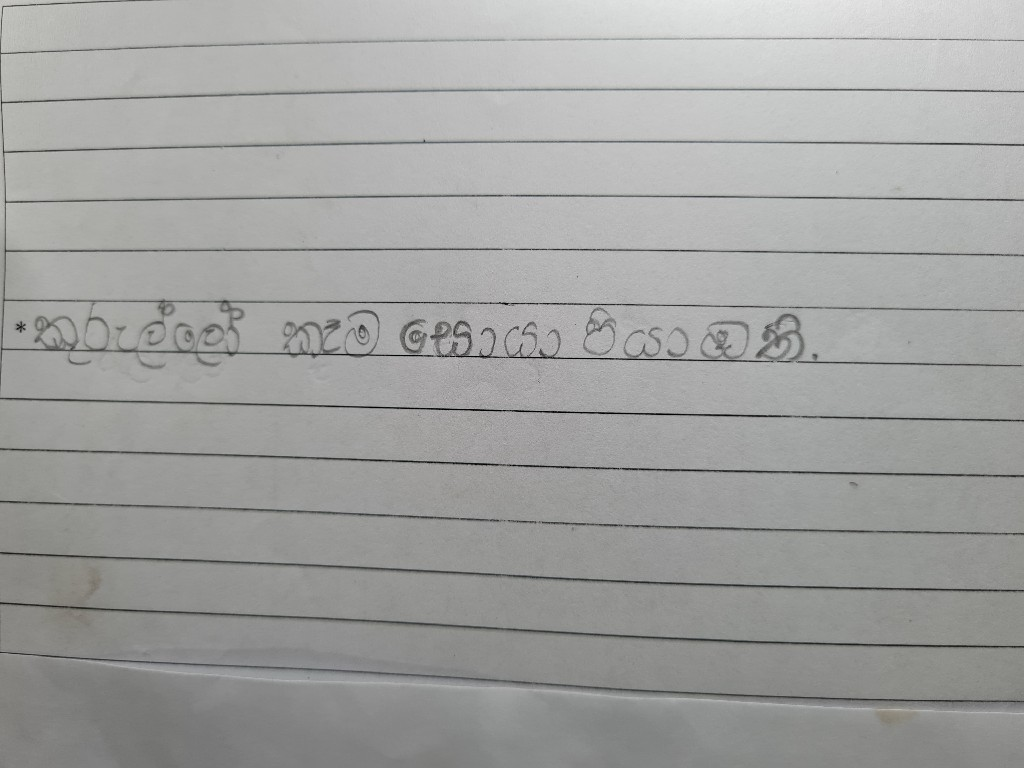

20230316_010241.jpg


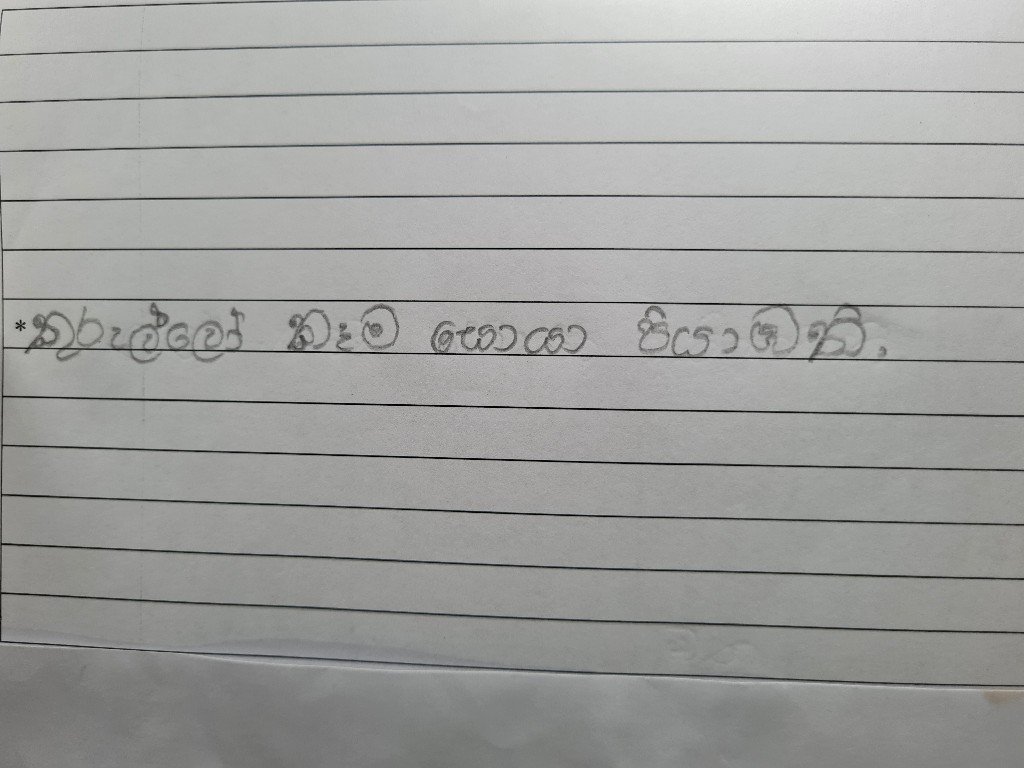

20230316_010104.jpg


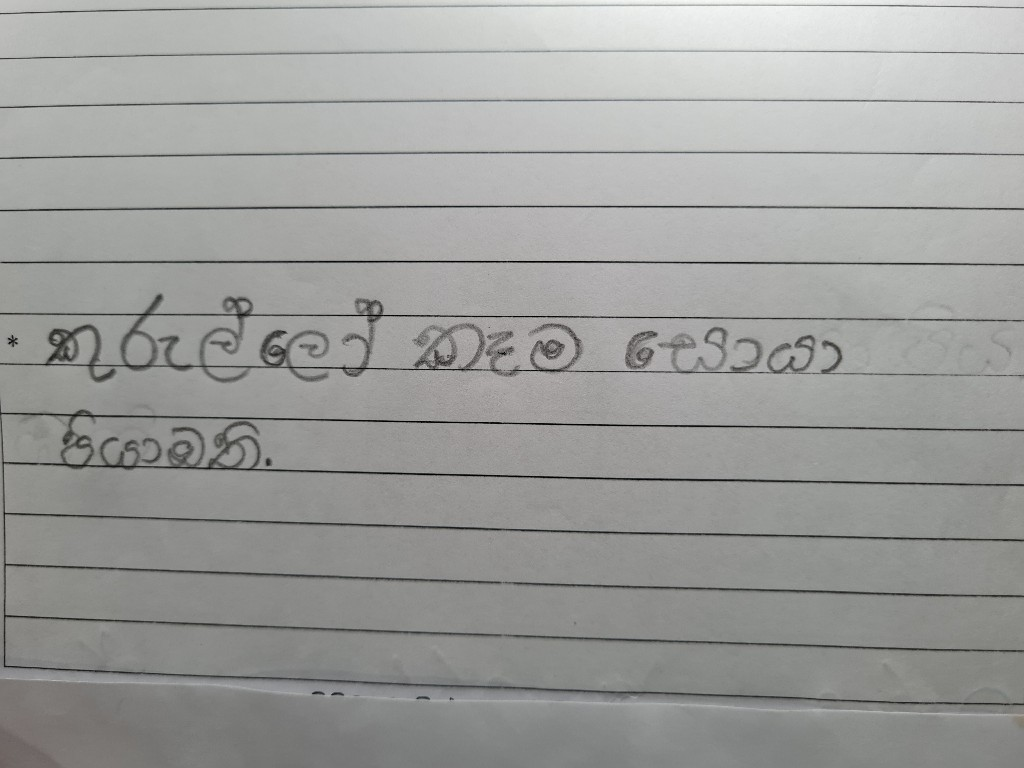

2023_03_10_19_18_IMG_4718.jpg


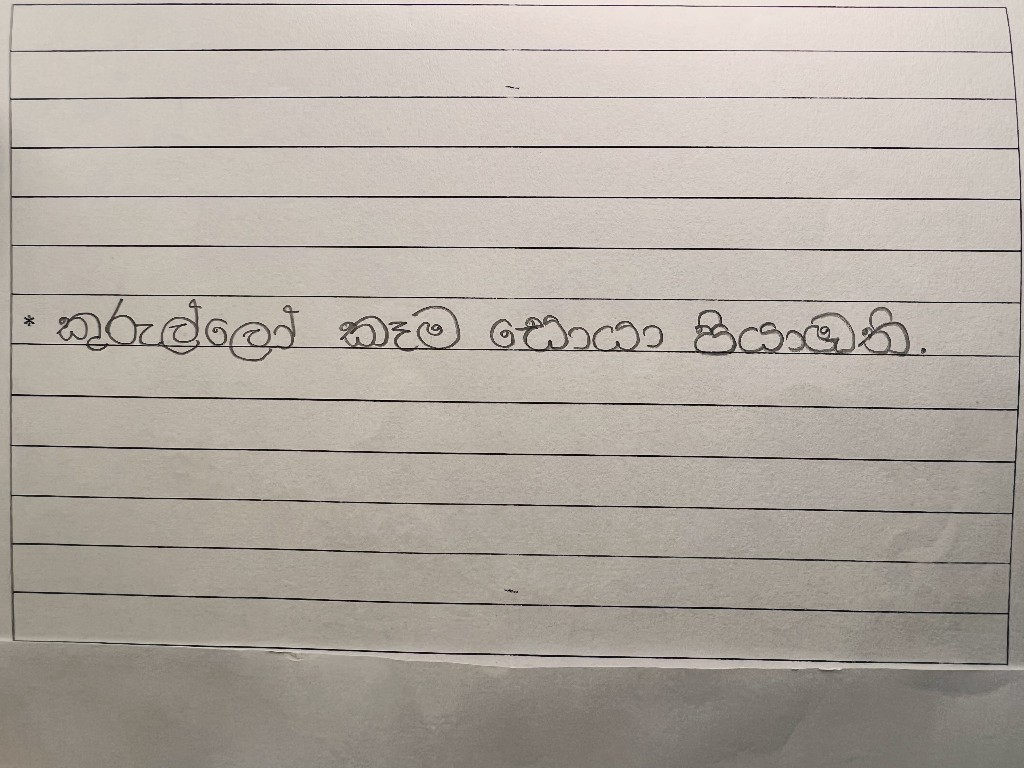

2023_03_10_19_10_IMG_4710.jpg


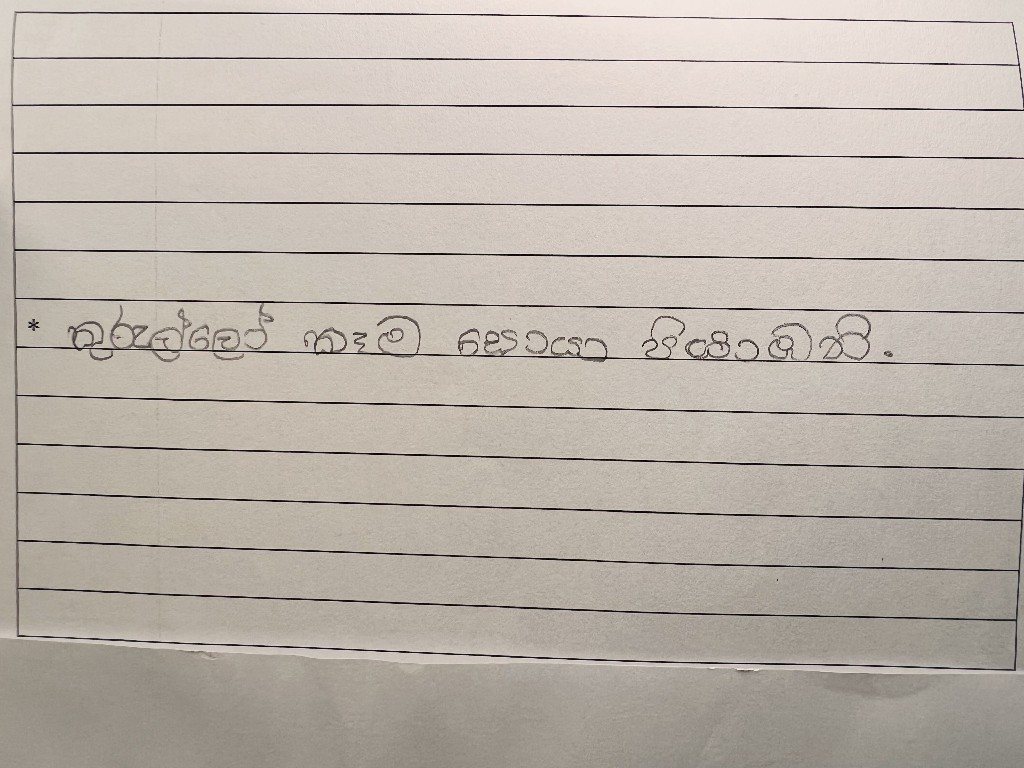

2023_03_10_19_09_IMG_4708.jpg


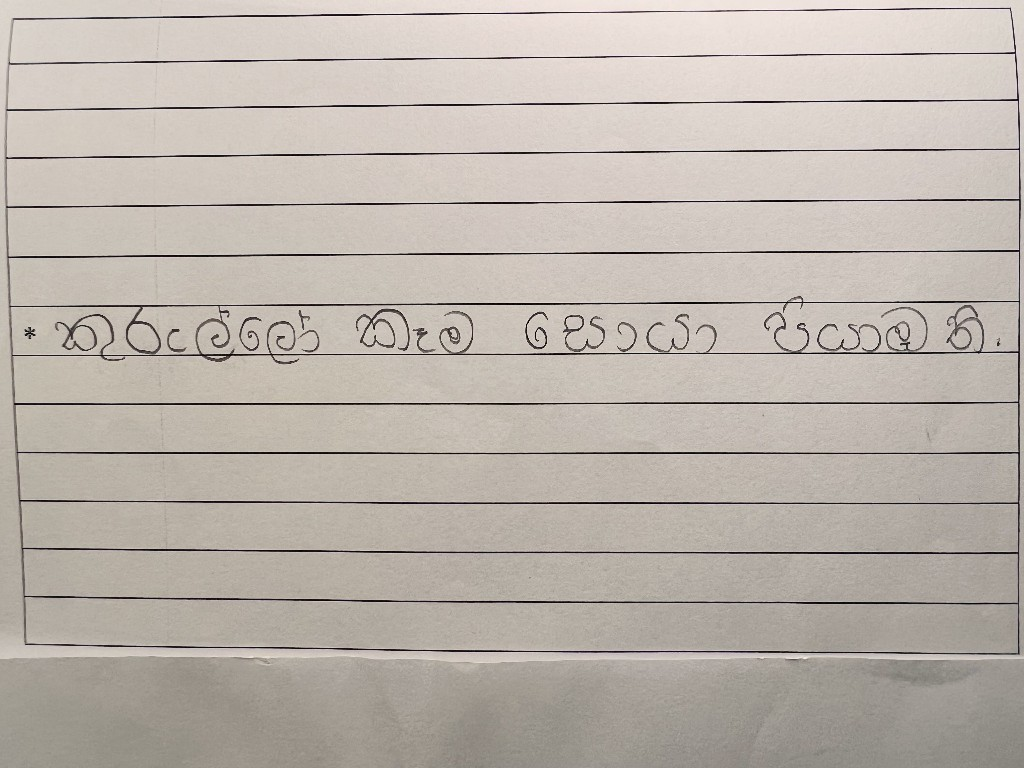

2023_03_10_15_23_IMG_4692.jpg


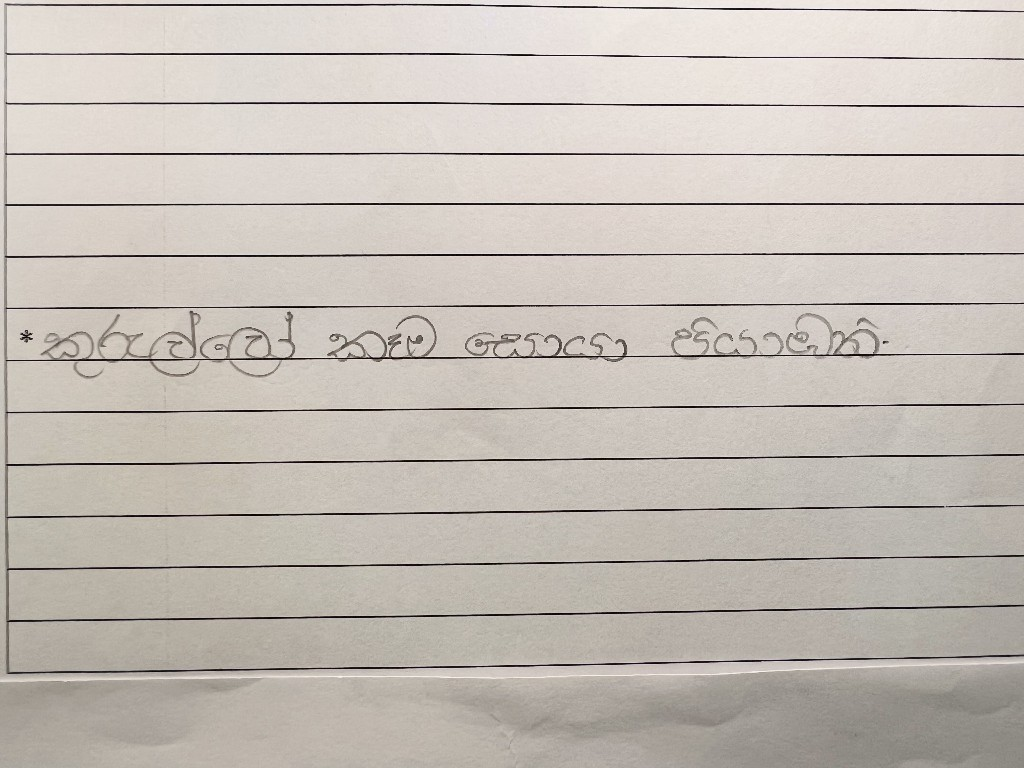

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/normal'


healthyFiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(healthyFiles)))
print("Image examples: ")


for i in range(10):
    print(healthyFiles[i])
    display(_Imgdis(filename=folder + "/" + healthyFiles[i], width=240, height=240))

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# vgg.input

In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/single/train/*')
print(len(folders))

2


In [ ]:
x = Flatten()(resnet.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=resnet.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from keras import optimizers


# adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 562 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 144 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/single/single_line_model_epochs_10.h5', 
                                verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(train_set),
  validation_steps=len(test_set),
  callbacks=callbacks ,verbose=2
    )


duration = datetime.now() - start
print("Training completed in time: ", duration)

<ipython-input-50-353cb74461fb>:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history=model.fit_generator(


Epoch 1/50

Epoch 1: val_loss improved from inf to 0.13395, saving model to /content/drive/MyDrive/IIT Research/AIS/Case1/single/SingleResNet50.h5
18/18 - 19s - loss: 0.1018 - accuracy: 0.9680 - val_loss: 0.1339 - val_accuracy: 0.9792 - 19s/epoch - 1s/step
Epoch 2/50

Epoch 2: val_loss did not improve from 0.13395
18/18 - 19s - loss: 0.1430 - accuracy: 0.9644 - val_loss: 0.2697 - val_accuracy: 0.9444 - 19s/epoch - 1s/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.13395
18/18 - 18s - loss: 0.1199 - accuracy: 0.9769 - val_loss: 0.4974 - val_accuracy: 0.9236 - 18s/epoch - 1s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.13395 to 0.11327, saving model to /content/drive/MyDrive/IIT Research/AIS/Case1/single/SingleResNet50.h5
18/18 - 21s - loss: 0.1756 - accuracy: 0.9680 - val_loss: 0.1133 - val_accuracy: 0.9722 - 21s/epoch - 1s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.11327
18/18 - 18s - loss: 0.1007 - accuracy: 0.9715 - val_loss: 0.1721 - val_accuracy: 0.95

In [ ]:
print(model_history.history)

{'loss': [0.10179808735847473, 0.14301374554634094, 0.11990394443273544, 0.17558790743350983, 0.1007121279835701, 0.2140069454908371, 0.3544800281524658, 0.20576466619968414, 0.1827114075422287, 0.14410445094108582, 0.07143179327249527, 0.09387937188148499, 0.1440400779247284, 0.18153496086597443, 0.12386639416217804, 0.03883003443479538, 0.12180612236261368, 0.41906264424324036, 0.27037346363067627, 0.11539018154144287, 0.10520124435424805, 0.147321879863739, 0.05246005207300186, 0.14673767983913422, 0.09195873886346817, 0.15007078647613525, 0.2063659280538559, 0.1902591437101364, 0.08460376411676407, 0.10987354069948196, 0.048850420862436295, 0.09794493764638901, 0.07241446524858475, 0.245529904961586, 0.19329650700092316, 0.1245027557015419, 0.09830060601234436, 0.18459947407245636, 0.12048471719026566, 0.03433289751410484, 0.18222488462924957, 0.13046087324619293, 0.01567075215280056, 0.005023007746785879, 0.030732188373804092, 0.1571691334247589, 0.14646349847316742, 0.08884582668

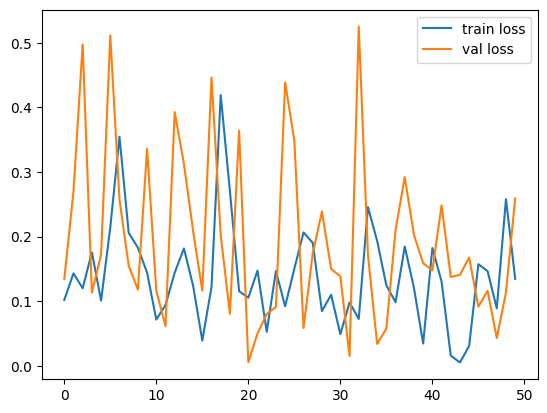

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')





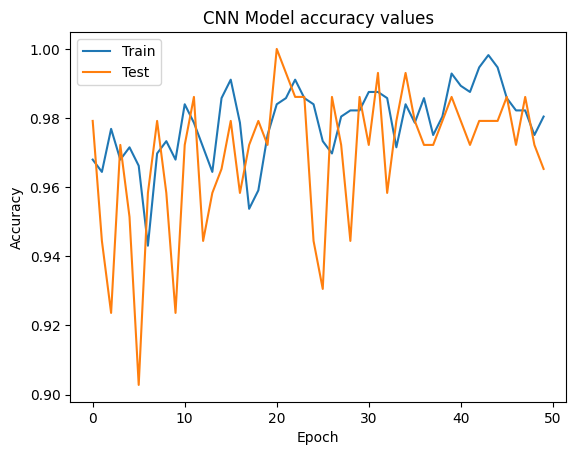

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(model_history.history['accuracy'] ,label='train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.savefig('AccVal_acc')

1/1 [==============================] - 1s 836ms/step
The prediction for this Best Model Detected Accuracies are:  [[0.9999999]]
The prediction for this Best Model Accuracy is:  0.9999999
The prediction for this Best Model Label is:  good


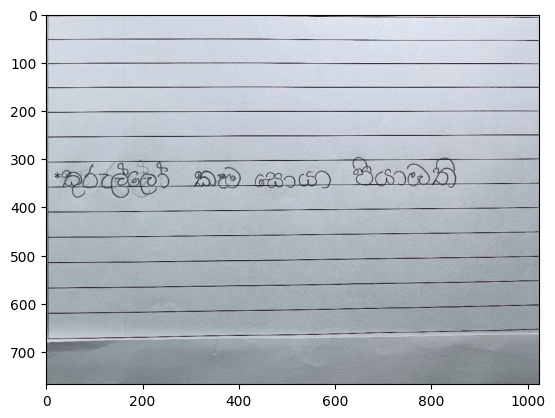

In [ ]:
# testing

import cv2
from PIL import Image
import numpy as np
import tensorflow as tf
from keras.models import load_model

SIZE = 224
img = cv2.imread('/content/drive/MyDrive/single/val/normal/2023_03_10_14_26_IMG_4647.jpg')
image = Image.fromarray(img, 'RGB')
image = image.resize((SIZE, SIZE))
image2 = np.array(image)
plt.imshow(img)
input_img = np.expand_dims(image2, axis=0) #Expand dims so the input is (num images, x, y, c)

# print("The prediction for this Prev is: [[1.0000000e+00 8.8115726e-14 3.4719598e-25 2.2141564e-24]]")
# print("The prediction for this image is: ", model.predict(input_img))



bestModel = load_model('/content/drive/MyDrive/single/single_line_model_epochs_10.h5');


labels = ['bad', 'good']
bestModelDetects=bestModel.predict(input_img)

bestModelDetectsAcc=np.amax(bestModelDetects )

maxIndex = np.where(bestModelDetects==bestModelDetectsAcc)

# print("The prediction for this Best Model Label is: ", labels[np.where(bestModelDetects==bestModelDetectsAcc)])
print("The prediction for this Best Model Detected Accuracies are: ", bestModelDetects)
print("The prediction for this Best Model Accuracy is: ", bestModelDetectsAcc)
print("The prediction for this Best Model Label is: ", labels[round(bestModelDetectsAcc)])
# print("The prediction for this All Model is: ", prevModel.predict(input_img))

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

import cv2


import tensorflow as tf
from keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import glob

DataTable =[]

Model = load_model('/content/drive/MyDrive/single/single_line_model_epochs_10.h5');


labels = ['bad', 'good']

SIZE = 224
n_path = '/content/drive/MyDrive/single' 
folder = n_path+'/Bad'

for im in glob.glob("/content/drive/MyDrive/single/Bad_c/*.jpg"):

    newraw = []
    
    fileName_absolute = os.path.basename(im)
    print(fileName_absolute)

    newraw.append(fileName_absolute)

    image1 = cv2.imread(im)
    # image1 = mpimg.imread(img)
    # plt.imshow(image1)

    image = Image.fromarray(image1, 'RGB')
    image = image.resize((SIZE, SIZE))
    image2 = np.array(image)
    input_img = np.expand_dims(image2, axis=0)

    print(len([image1]))
    # results1 = model.detect([image1], verbose=1)
    ModelDetects=Model.predict(input_img)
    print(ModelDetects)

    ModelDetectsAcc=np.amax(ModelDetects)

    maxIndex = np.where(ModelDetects==ModelDetectsAcc)
    print("The prediction for this Best Model Detected Accuracies are: ", ModelDetects)
    print("The prediction for this Best Model Accuracy is: ", round(ModelDetectsAcc,6))
    # if(ModelDetectsAcc<1):
    acc= round(ModelDetectsAcc , 6)
          
    print("The prediction for this Best Model Label is: ", labels[round(ModelDetectsAcc)])

    newraw.append(acc)

    DataTable.append(newraw)



print(DataTable)

# healthyFiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
# print("Working with {0} images".format(len(healthyFiles)))
# print("Image examples: ")




# for i in range(10):
#     print(healthyFiles[i])
#     display(_Imgdis(filename=folder + "/" + healthyFiles[i], width=240, height=240))

In [ ]:
import csv

header = ['image', 'prediction', 'ground_truth']
data = DataTable
with open('bad_chilies_green_train_set.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
SIZE = 224

dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.
val_path = '/content/drive/MyDrive/single/test/'


parasitized_images = os.listdir(val_path + 'issue/')
for i, image_name in enumerate(parasitized_images):    #Remember enumerate method adds a counter and returns the enumerate object
    
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(val_path + 'issue/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

#Iterate through all images in Uninfected folder, resize to 64 x 64
#Then save into the same numpy array 'dataset' but with label 1

uninfected_images = os.listdir(val_path + 'normal/')
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(val_path + 'normal/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

        

dataset = np.array(dataset)
label = np.array(label)

from sklearn.model_selection import train_test_split
#from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.90, random_state = 0)


import tensorflow as tf

from keras.models import load_model


bestModel = load_model('/content/drive/MyDrive/single/single_line_model_epochs_10.h5');

print(y_test)
_, acc = bestModel.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


[0 0 0 0 1 0 0 1 1 0 1 1 0 0 0]
1/1 [==============================] - 2s 2s/step - loss: 0.3213 - accuracy: 0.9333
Accuracy =  93.33333373069763 %


In [ ]:
val_path = '/content/drive/MyDrive/single/test'

image_gen_test = ImageDataGenerator(rescale=1/255.)


val_set = image_gen_test.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 11,
                                            class_mode = 'binary')

Model = load_model('/content/drive/MyDrive/single/single_line_model_epochs_10.h5');
result = Model.evaluate(val_set,batch_size=24)
print("test_loss, test accuracy",result)

Found 16 images belonging to 2 classes.
2/2 [==============================] - 2s 617ms/step - loss: 1.8587 - accuracy: 0.6250
test_loss, test accuracy [1.8586655855178833, 0.625]


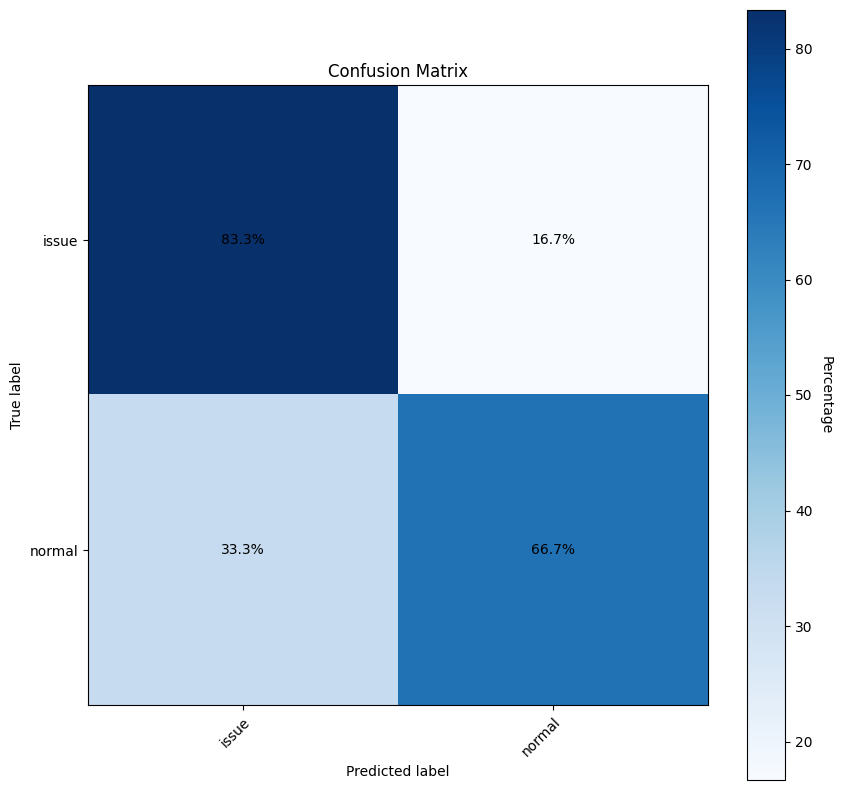

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Define class labels
labels = ["issue" ,"normal"]

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm_percent, cmap='Blues')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Percentage', rotation=-90, va='bottom')

# Set tick labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, f'{cm_percent[i, j]:.1f}%', ha='center', va='center', color='black')

# Set title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names =  ["issue" ,"normal"]

classification_rep = classification_report(y_true, y_pred, target_names=target_names)
print(classification_rep)

              precision    recall  f1-score   support

       issue       0.71      0.83      0.77         6
      normal       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12

